## Training Natural Language Understanding Component

To train a Rasa NLU model we will need some real conversational data. grouping user messages by their intents. The intent describes what the messages mean. Another important part of training data are entities - pieces of information which help a chatbot understand what specifically a user is asking about

In [ ]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

import sys
!{sys.executable} -m spacy download en;

def pprint(o):
    # small helper to make dict dumps a bit prettier
    print(json.dumps(o, indent=2))

## Natural Language Understanding

Before anything, our chatbot needs to understand the user before doing any processing. This is done by a Rasa NLU model which will parse user inputs and perform intent classification and entity extraction tasks. To do this, we have to provide some sample conversational data.

First, we group possible user inputs by their intent (e.g. "hello", "hi", "hey" are different inputs with the same "greet" intent):

In [72]:
%cat samples/sample_intents.md

## intent:greet
- hey
- hello there
- hi
- hello there
- good morning
- good evening
- hey there
- let's go
- hey dude
- goodmorning
- goodevening
- good afternoon

## intent:goodbye
- see you
- good by
- cee you later
- good night
- good afternoon
- bye
- goodbye
- have a nice day
- see you around
- bye bye
- see you later
- good bye

## intent:affirm
- yes
- indeed
- of course
- that sounds good
- correct
- definitely
- absolutely
- sure
- yep

## intent:deny
- no
- never
- I don't think so
- don't like that
- no way
- not really
- nope
- definitely no
- no no

## intent:thanks
- thanks
- thank you
- thank you very much
- thanks a lot
- thank you so much
- thank you loads
- tnx

We also need to define the preprocessing pipeline that the user input has to go through for the intent/entity extractors to work. 

### Training the NLU Model

In [134]:
from rasa_nlu.training_data import load_data
from rasa_nlu.model import Trainer
from rasa_nlu import config

# loading the nlu training samples
training_data = load_data("nlu_data/intents.md")

# trainer to educate our pipeline
trainer = Trainer(config.load("config.yml"))

# train the model!
interpreter = trainer.train(training_data, verbose=True)

# store it for future use
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")

INFO:rasa_nlu.training_data.loading:Training data format of nlu_data/intents.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 69 (8 distinct intents)
	- Found intents: 'inform', 'goodbye', 'greet', 'thanks', 'deny', 'presence_check', 'results_query', 'affirm'
	- entity examples: 19 (2 distinct entities)
	- found entities: 'season', 'team'

INFO:rasa_nlu.utils.spacy_utils:Trying to load spacy model with name 'en'
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.model:Starting to train component nlp_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component tokenizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_featurizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_entity_featurizer_regex
INFO:rasa_nlu.model:Finished training

Fitting 2 folds for each of 6 candidates, totalling 12 fits


### Using and Evaluating the NLU Model

We can evaluate the trained model to see how the model captures the intents and entities in test data:

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.training_data.loading:Training data format of nlu_data/intents.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 69 (8 distinct intents)
	- Found intents: 'inform', 'goodbye', 'greet', 'thanks', 'deny', 'presence_check', 'results_query', 'affirm'
	- entity examples: 19 (2 distinct entities)
	- found entities: 'season', 'team'

INFO:rasa_nlu.evaluate:Intent evaluation results:
INFO:rasa_nlu.evaluate:Intent Evaluation: Only considering those 69 examples that have a defined intent out of 69 examples
INFO:rasa_nlu.evaluate:F1-Score:  0.9854820415879019
INFO:rasa_nlu.evaluate:Precision: 0.9866220735785953
INFO:rasa_nlu.evaluate:Accuracy:  0.9855072463768116
INFO:rasa_nlu.evaluate:Classification report: 
                precision    recall  f1-score   support

        affirm       1.00      1.00      1.00         9
          deny       1.00      1.00    

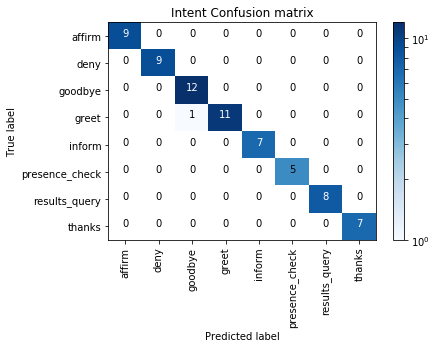

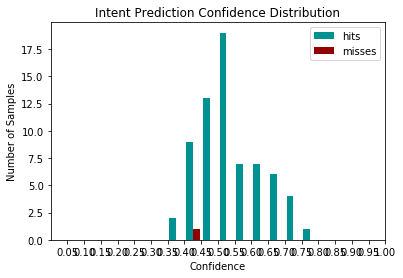

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  1.0
INFO:rasa_nlu.evaluate:Precision: 1.0
INFO:rasa_nlu.evaluate:Accuracy:  1.0
INFO:rasa_nlu.evaluate:Classification report: 
             precision    recall  f1-score   support

  no_entity       1.00      1.00      1.00       163
     season       1.00      1.00      1.00        18
       team       1.00      1.00      1.00        21

avg / total       1.00      1.00      1.00       202



In [135]:
from rasa_nlu.evaluate import run_evaluation

run_evaluation("nlu_data/intents.md", model_directory)

We are going to get good performance if we evaluate the model on training data. We can also have additional intents data set aside only for evaluation:

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.training_data.loading:Training data format of nlu_data/intents_eval.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 7 (2 distinct intents)
	- Found intents: 'results_query', 'greet'
	- entity examples: 6 (1 distinct entities)
	- found entities: 'team'

INFO:rasa_nlu.evaluate:Intent evaluation results:
INFO:rasa_nlu.evaluate:Intent Evaluation: Only considering those 7 examples that have a defined intent out of 7 examples
INFO:rasa_nlu.evaluate:F1-Score:  0.7792207792207791
INFO:rasa_nlu.evaluate:Precision: 0.8571428571428571
INFO:rasa_nlu.evaluate:Accuracy:  0.7142857142857143
INFO:rasa_nlu.evaluate:Classification report: 
               precision    recall  f1-score   support

       affirm       0.00      0.00      0.00         0
        greet       0.00      0.00      0.00         1
       inform       0.00      0.00      0.00         0
results

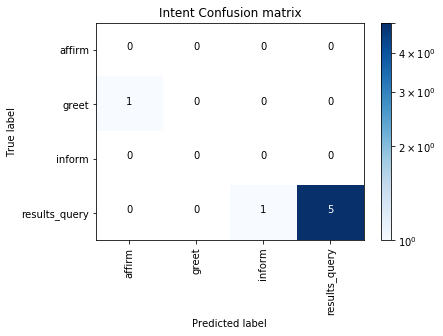

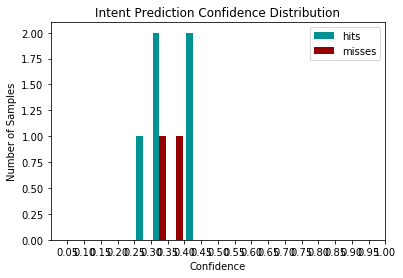

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  0.9280000000000002
INFO:rasa_nlu.evaluate:Precision: 0.9384615384615385
INFO:rasa_nlu.evaluate:Accuracy:  0.9333333333333333
INFO:rasa_nlu.evaluate:Classification report: 
             precision    recall  f1-score   support

  no_entity       0.92      1.00      0.96        24
       team       1.00      0.67      0.80         6

avg / total       0.94      0.93      0.93        30



In [136]:
run_evaluation("nlu_data/intents_eval.md", model_directory)

We can also test the model's performance continously with user input:

In [137]:
while True:
    q = input()
    parsed_query = interpreter.parse(q)
    parsed_intent = parsed_query.get('intent')
    parsed_entities = parsed_query.get('entities')
    
    print("Intent:"), pprint(parsed_intent)
    print("Entities:"), pprint(parsed_entities)
    if q == 'stop':
        break

give me the results for arsenal in 2003-04
Intent:
{
  "name": "results_query",
  "confidence": 0.4565207830535907
}
Entities:
[
  {
    "start": 24,
    "end": 31,
    "value": "arsenal",
    "entity": "team",
    "confidence": 0.9792622886153938,
    "extractor": "ner_crf"
  },
  {
    "start": 35,
    "end": 42,
    "value": "2003 - 04",
    "entity": "season",
    "confidence": 0.9512277250240796,
    "extractor": "ner_crf"
  }
]
stop
Intent:
{
  "name": "greet",
  "confidence": 0.2882134661948092
}
Entities:
[]


## Handling the Dialogue


We have taught our assistant how to understand user inputs. Now, it's time to teach it how to make responses by training a dialogue management model using Rasa Core.

### Defining the Bot's Actions

The bot's responses either follow a simple text response (utter action) or can be implemented as custom actions which are coded in Python classes:

In [119]:
%cat samples/sample_action.py

from rasa_core_sdk import Action

class SampleAction(Action):
    def name(self):
        return "action_sample_action"

    def run(self, dispatcher, tracker, domain):
        slot = tracker.get_slot('slot')
        
        dispatcher.utter_message("slot value = {}".format(slot))

### Defining the Domain

The domain specifies the universe that the bot operates in. In our case this universe consists of intents and entities as well as the actions which appear in training stories. The domain can also contain the templates for the answers a bot should use to respond to the user and slots which will help the bot to keep track of the context. 

In [75]:
%cat samples/sample_domain.yml

intents:
  - greet 
  - goodbye
  - affirm
  - deny
  - thanks

slots:
  sample_slot:
    type: text

entities:
  - sample_entity

actions:
  - utter_greet
  - utter_goodbye
  
templates:
  utter_greet:
    - text: "Hello!"
    - text: "Hey!!"
  utter_goodbye:
    - text: "Bye!"
  

## Stories

Dialogues are represented with stories in Rasa. A story is an actual conversation where user inputs are expressed as intents as well as corresponding entities, and chatbot responses are expressed as actions:

In [129]:
%cat samples/sample_stories.md

## Sample Story
* greet
    - utter_greet
* results_query
    - utter_what_team
* inform{"team":"Arsenal"}
    - utter_what_season
* inform{"season":"1996-97"}
    - action_get_results
* thanks
    - utter_np
* goodbye
    - utter_goodbye

Here is a visualization of the interaction sequence of the stories:

![](story_graph.png)

## Training the Dialogue Model

With everything in the domain defined, we can now train the dialogue model which handles the users queries:

In [138]:
from rasa_core.policies import KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent

agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy()])

# loading our training dialogues
training_data = agent.load_data('nlu_data/stories.md')

agent.train(
    training_data,
    validation_split=0.0,
    epochs=200
)

agent.persist('models/dialogue')

Processed Story Blocks: 100%|██████████| 7/7 [00:00<00:00, 115.12it/s, # trackers=14]
Processed actions: 309it [00:01, 264.41it/s, # examples=309]
INFO:rasa_core.policies.keras_policy:Fitting model with 309 total samples and a validation split of 0.0


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 5, 24)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                7296      
_________________________________________________________________
dense (Dense)                (None, 12)                396       
_________________________________________________________________
activation (Activation)      (None, 12)                0         
Total params: 7,692
Trainable params: 7,692
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
309/309 [==============================] - 1s 3ms/step - loss: 2.4131 - acc: 0.1715
Epoch 2/200
309/309 [==============================] - 0s 304us/step - loss: 2.2388 - acc: 0.5049
Epoch 3/200
309/309 [==============================] - 0s 307us/step - loss: 2

309/309 [==============================] - 0s 328us/step - loss: 0.1875 - acc: 0.9838
Epoch 76/200
309/309 [==============================] - 0s 303us/step - loss: 0.2072 - acc: 0.9709
Epoch 77/200
309/309 [==============================] - 0s 305us/step - loss: 0.1764 - acc: 0.9773
Epoch 78/200
309/309 [==============================] - 0s 304us/step - loss: 0.1784 - acc: 0.9773
Epoch 79/200
309/309 [==============================] - 0s 282us/step - loss: 0.1770 - acc: 0.9806
Epoch 80/200
309/309 [==============================] - 0s 287us/step - loss: 0.1857 - acc: 0.9741
Epoch 81/200
309/309 [==============================] - 0s 261us/step - loss: 0.1907 - acc: 0.9709
Epoch 82/200
309/309 [==============================] - 0s 266us/step - loss: 0.1579 - acc: 0.9741
Epoch 83/200
309/309 [==============================] - 0s 297us/step - loss: 0.1627 - acc: 0.9741
Epoch 84/200
309/309 [==============================] - 0s 296us/step - loss: 0.1718 - acc: 0.9676
Epoch 85/200
309/309 [=

309/309 [==============================] - 0s 310us/step - loss: 0.0406 - acc: 0.9968
Epoch 158/200
309/309 [==============================] - 0s 278us/step - loss: 0.0347 - acc: 0.9935
Epoch 159/200
309/309 [==============================] - 0s 270us/step - loss: 0.0525 - acc: 0.9903
Epoch 160/200
309/309 [==============================] - 0s 265us/step - loss: 0.0514 - acc: 0.9903
Epoch 161/200
309/309 [==============================] - 0s 256us/step - loss: 0.0456 - acc: 0.9935
Epoch 162/200
309/309 [==============================] - 0s 259us/step - loss: 0.0438 - acc: 0.9903
Epoch 163/200
309/309 [==============================] - 0s 250us/step - loss: 0.0391 - acc: 0.9935
Epoch 164/200
309/309 [==============================] - 0s 254us/step - loss: 0.0523 - acc: 0.9903
Epoch 165/200
309/309 [==============================] - 0s 263us/step - loss: 0.0466 - acc: 0.9838
Epoch 166/200
309/309 [==============================] - 0s 284us/step - loss: 0.0381 - acc: 0.9871
Epoch 167/200


INFO:rasa_core.policies.keras_policy:Done fitting keras policy model
INFO:rasa_core.agent:Model directory models/dialogue exists and contains old model files. All files will be overwritten.
INFO:rasa_core.agent:Persisted model to '/Users/kasra/projects/cai-assignment/lab/models/dialogue'


## Testing the Bot

We now have everything needed to run the bot. The only remaining thing to take care of is setting up a server listening for requests for custom actions. You can use the following commands and configurations in the assignment to set up the server easily.

First we have to define a webhook configuration file:

In [122]:
%cat endpoint.yml

action_endpoint:
  url: "http://localhost:5055/webhook"

The actions server can now be started with the following command from the command line:

**python -m rasa_core_sdk.endpoint --actions actions**

After setting up the server, we can start the bot and talk with it!

In [143]:
import IPython
from IPython.display import clear_output
from rasa_core.agent import Agent
from rasa_core.interpreter import NaturalLanguageInterpreter
from rasa_core.utils import EndpointConfig

messages = ["Hi! you can chat in this window. Type 'stop' to end the conversation."]
interpreter = NaturalLanguageInterpreter.create('models/nlu/default/current/')
endpoint = EndpointConfig('http://localhost:5055/webhook')
agent = Agent.load('models/dialogue', interpreter=interpreter, action_endpoint = endpoint)
tracker = agent.tracker_store.get_or_create_tracker("sender_id") 
# get current tracker state
tracker.current_state()

print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    responses = agent.handle_text(a)
    for response in responses:
        print(response["text"])

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


Your bot is ready to talk! Type your messages here or send 'stop'
give me the results for arsenal in 2003-04
arsenal won 26 games in the 2003-04 season
stop


## [OPTIONAL] Generating New Story Graphs

You can use the following code to generate new interaction diagrams for your stories. However, due to compatibility issues in the current Rasa version, the process for installing the required library (pygraphviz) is complicated and this part is only in case you are interested.

In [131]:
from IPython.display import Image
from rasa_core.agent import Agent

agent = Agent('domain.yml')
agent.visualize("nlu_data/stories.md", "story_graph.png", max_history=2)

Processed Story Blocks: 100%|██████████| 7/7 [00:00<00:00, 148.76it/s, # trackers=1]
